In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression # The Machine Learnig Algorithms
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # This can be used to scale your data
import matplotlib.pyplot as plt
import seaborn as sb

## Data Exploration and Cleaning

- Explore the different columns in the data
- Check for missing values and use appropriate techniques to fill/remove the missing values

In [37]:
df = pd.read_csv("./train.csv")

In [38]:
df.shape

(700, 2)

In [39]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [40]:
df.isnull().sum()# Checking for missing values

x    0
y    1
dtype: int64

In [41]:
#Fill in the missing values
# df.fillna(method='backfill',inplace=True)
#Remove the missing values
df.dropna(inplace=True)

## Visualize your data by plotting
- In this case we just have 1 independent variable 'x' and 1 dependent variable 'y'

In [42]:
x_train = np.array(df['x'])#The independet variable/feature
y_train = np.array(df['y'])#The dependent variable/output

Text(0, 0.5, 'Y Values - Dependent Variable')

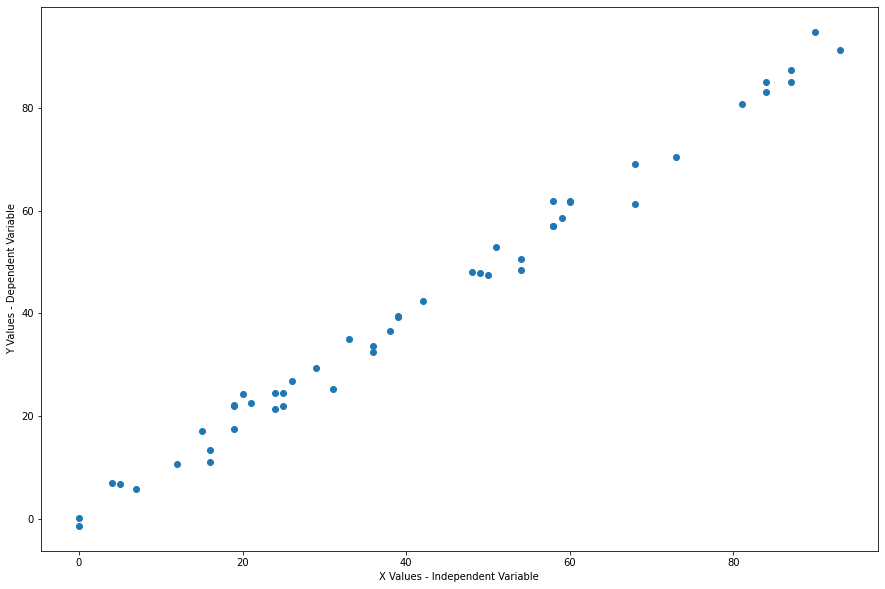

In [43]:
plt.figure(figsize=(15,10))
plt.scatter(x_train[:50],y_train[:50])
plt.xlabel("X Values - Independent Variable")
plt.ylabel("Y Values - Dependent Variable")

## Building a Simple Linear Regression Model
- We will use the scikit-learn package to implement the Linear Regression Model
- This model is used to get the best-fit line to the above plot

In [44]:
reg = LinearRegression()# Define the model's object
reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))#Call the object's function to fit/train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Now let us look at our predictions best-fit line versus the actual values on the ****Test dataset****

In [118]:
df_test = pd.read_csv("./test.csv")#Reading the test dataset
x_test = np.array(df_test['x'])#Store the x-test values
y_test = np.array(df_test['y'])#Store the y-test values

- Calling your trained Machine Learning Model to make predictions on unknown data points

In [120]:
model_predictions  =reg.predict(x_test.reshape(-1,1))

Text(0, 0.5, 'Y Test Values - Dependent Variable')

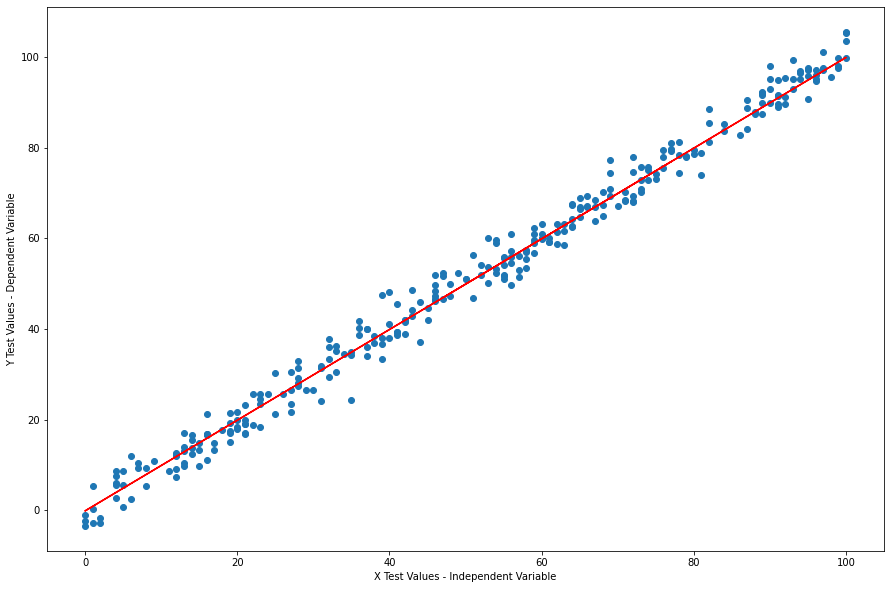

In [121]:
plt.figure(figsize=(15,10))
plt.scatter(x_test,y_test)
plt.plot(x_test,model_predictions,color='r')
plt.xlabel("X Test Values - Independent Variable")
plt.ylabel("Y Test Values - Dependent Variable")

## Evaluating our model quantitatively
- Since this is a Regression task, we cannot rely on accuracy
- Metrics such as R2 score, mean squared error, mean absolute error etc. are used to evaluate such tasks

In [123]:
mean_squared_error(y_test,model_predictions) # There is a lot of room for improvement

9.432922192039305

## Building the Logistic Regression Model

In [58]:
df_social = pd.read_csv("./Social_Network_Ads.csv")# Reading the new dataset

In [96]:
df_social.shape

(400, 5)

In [59]:
df_social.sample(10)# A glimpse into the data

,User ID,Gender,Age,EstimatedSalary,Purchased
96,15710257,Female,35,25000,0
374,15793890,Female,37,80000,0
182,15694288,Female,32,117000,1
139,15741094,Male,19,25000,0
19,15621083,Female,48,29000,1
44,15715541,Female,28,84000,0
155,15610140,Female,31,15000,0
363,15768293,Female,42,79000,0
238,15617877,Female,46,82000,0
250,15810075,Female,44,39000,0


In [60]:
#Checking for missing values
df_social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Training the Logistic Regression Model
- In this case since we have only one dataset, we need to split it into trainig 
and testing datasets
- We will be using scikit-learn to do the splitting 

In [97]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_social[['Age','EstimatedSalary']],df_social[['Purchased']],\
                                                          test_size=0.1) # Splitting the data into train and test

In [110]:
log_reg = LogisticRegression()# Initializing the model
log_reg.fit(x_train_2,y_train_2)#Training the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate your models using some metrics
- Accuracy, recall and precision are the most common metrics used to evaluate models for classification problems

In [111]:
social_predictions = log_reg.predict(x_test_2)

In [112]:
print(classification_report(y_test_2,social_predictions))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualize the Ground-Truth values Vs predictions

- We will first look at the ground-truth testing dataset values
- Next we will look at how our model is making the predictions

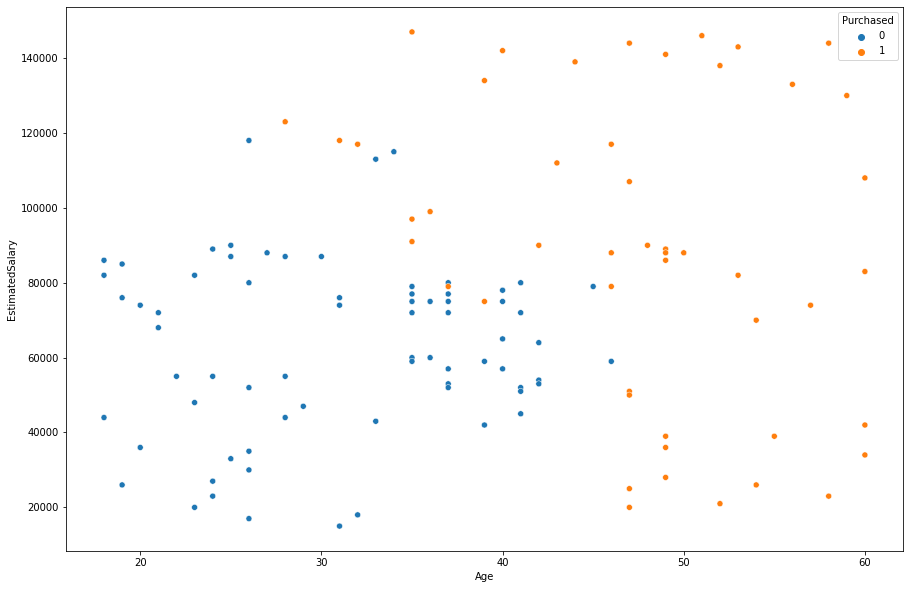

In [92]:
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test_2, x = 'Age',y = 'EstimatedSalary',hue=y_test_2['Purchased'])

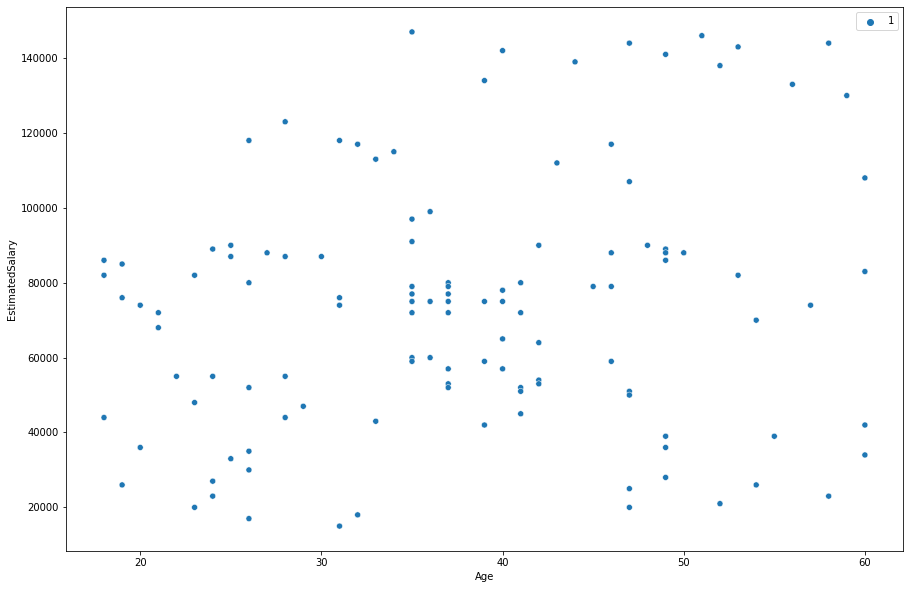

In [93]:
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test_2, x = 'Age',y = 'EstimatedSalary',hue=social_predictions)